## Lead Scoring Case Study




With 15 predictor variables in the end, we need to assign a score or probability for lead conversion and derive insights from them.

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Importing all datasets
Leads_data = pd.read_csv("Leads.csv")
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
Leads_data.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
Leads_data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Step 2: EDA and Data Cleaning


In [8]:
#Drop where more than 1/3rd data is null
for col in Leads_data.columns:
    if Leads_data[col].isnull().sum() > 3080:
        Leads_data.drop(col, 1, inplace=True)
        


In [9]:
Leads_data.shape

(9240, 31)

In [10]:
Leads_data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

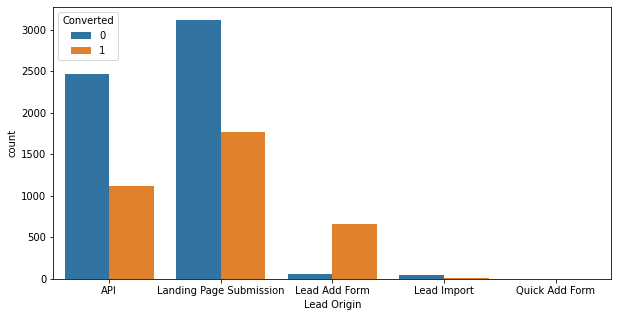

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Lead Origin", hue="Converted", data=Leads_data)
plt.show()

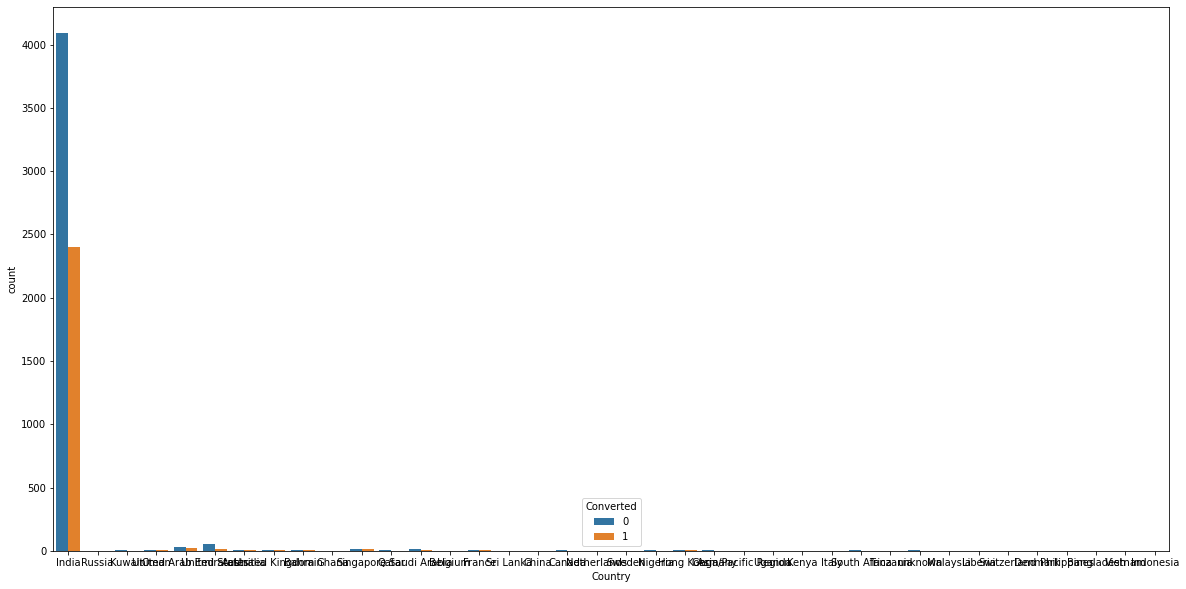

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Country", hue="Converted", data=Leads_data)
plt.show()

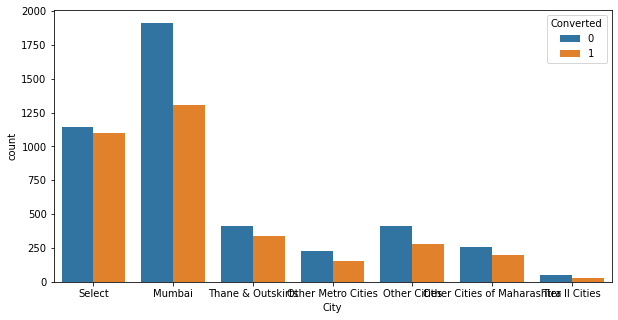

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x="City", hue="Converted", data=Leads_data)
plt.show()

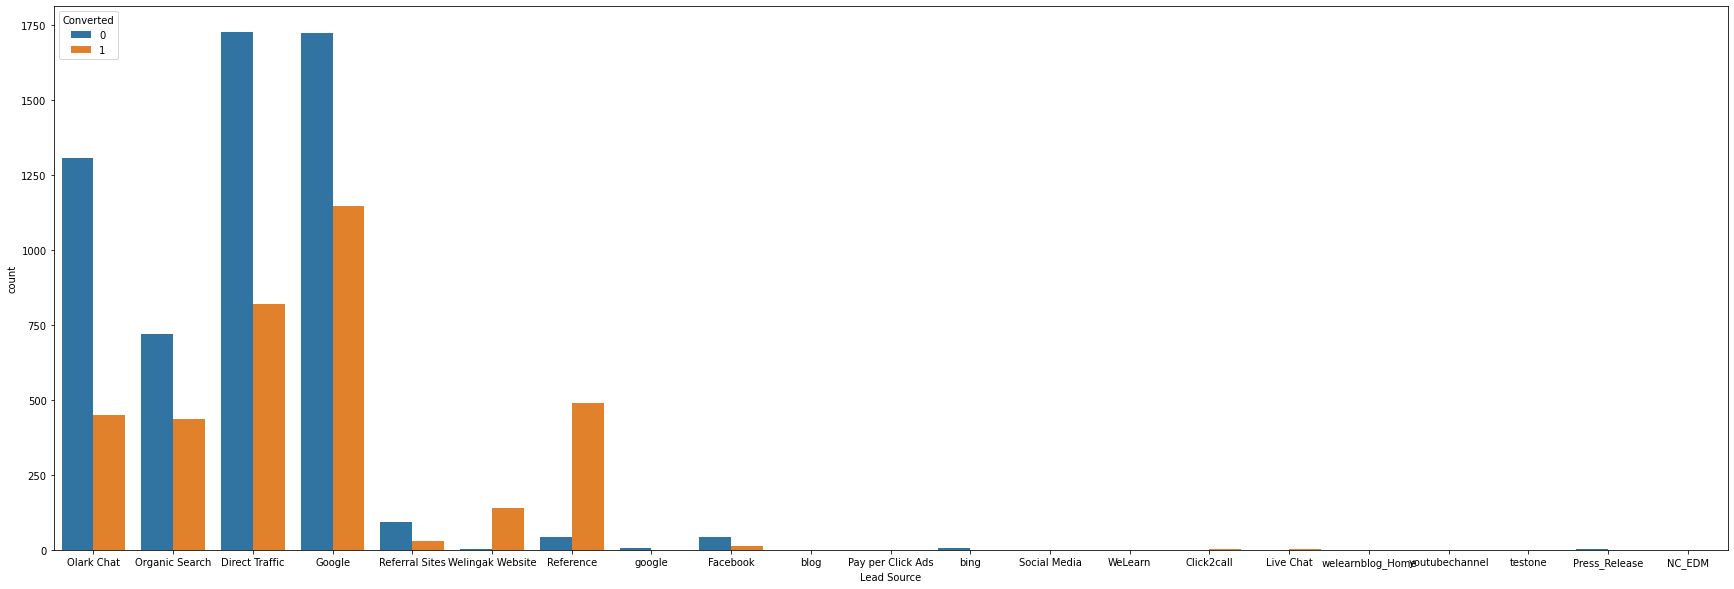

In [14]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Lead Source", hue="Converted", data=Leads_data)
plt.show()

In [15]:
for i in Leads_data.columns:
    print(Leads_data[i].value_counts())
    print('---------------------------------------')

e5fa7c83-3591-44ad-a8d9-106371038276    1
e3211b36-e3a0-4c10-87d3-92542e5ba789    1
f3862353-e3ca-4ff5-a494-ee30ce1503fb    1
4e7b3ead-5c97-427c-905f-4bcbd88aacf5    1
60f6fe47-82b0-4b05-97c8-566f1de48ff1    1
                                       ..
b8d39860-62c9-4194-9744-f9bdd3e71d94    1
e62cf5df-bd08-4e4e-b0cb-45d88de35c58    1
3372c73e-8af8-443c-89dc-1a7423bc2859    1
de276271-e932-4686-aebb-00b146d2f6ec    1
66099c96-232e-4156-97c3-9040650798db    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---------------------------------------
Go

In [16]:
#Delete columns not required
Leads_data = Leads_data.drop(['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine', 'Newspaper Article','Newspaper','X Education Forums','Digital Advertisement','Through Recommendations','Search','Do Not Call','What matters most to you in choosing a course' ], axis = 1 )

In [17]:
Leads_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   How did you hear about X Education      7033 non-null   object 
 10  What is your current occupation         6550 non-null   obje

In [18]:
Leads_data.shape

(9240, 14)

In [19]:
#Checking percentage missing values in each column
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Lead Profile                              29.32
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [20]:
for column in Leads_data:
    print(Leads_data[column].astype('category').value_counts())
    print('___________________________________________________')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
___________________________________________________
0    5679
1    35

'Select' refers users did not choose any option. Based on count these could be dropped.

In [21]:
Leads_data.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Lead Profile                              2709
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [22]:
have_select = []
for i in Leads_data:
    if len(Leads_data[i].isin(['Select']).unique())>1:
        have_select.append(i)

In [23]:
have_select

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [24]:
for i in have_select:
    Leads_data[i] = Leads_data[i].replace('Select',np.NaN)

Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,NaN,Unemployed,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,Student,Potential Lead,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,NaN,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Other,Unemployed,NaN,No,Modified


In [25]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Lead Profile                              74.19
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [26]:
#Dropping the columns with more than 40% missing values
Leads_data = Leads_data.drop(['How did you hear about X Education','Lead Profile'], axis =1)

In [27]:
below = list(round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)[round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2) > 0].index)

below

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation']

In [28]:
#For these, imputing by mode
print(Leads_data['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', Leads_data['Lead Source'].isna().sum())
print('=================================================================')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
NC_EDM                  1
blog                    1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 36


In [29]:
Leads_data['Lead Source'] = Leads_data['Lead Source'].replace(np.NaN,'Google')

print(Leads_data['Lead Source'].value_counts())
print('-----------')
print('Missing values count --->', Leads_data['Lead Source'].isna().sum())


Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
welearnblog_Home        1
NC_EDM                  1
blog                    1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64
-----------
Missing values count ---> 0


In [30]:
print(Leads_data['Specialization'].value_counts())
print('-----------')
print('Missing values count --->', Leads_data['Specialization'].isna().sum())

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
-----------
Missing values count ---> 3380


In [31]:
#Very large number of missing values, so these should not be imputed. Instead categorize them as Missing
Leads_data['Specialization'] = Leads_data['Specialization'].replace(np.NaN,'Missing')
Leads_data['Specialization'].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [32]:
print(Leads_data['What is your current occupation'].value_counts())
print('-----------')
print('Missing values count --->', Leads_data['What is your current occupation'].isna().sum())

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
-----------
Missing values count ---> 2690


In [33]:
#Large number of missing values, so creating a category Missing
Leads_data['What is your current occupation'] = Leads_data['What is your current occupation'].replace(np.NaN,'Missing')
Leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
#as seen above, totalVisits, page views, Last Activity have very less missing values, so imputing them by mode
Mode_Impute = ['TotalVisits','Page Views Per Visit','Last Activity'] # assigning them in a list

for i in Leads_data[Mode_Impute].columns:
    print(Leads_data[i].value_counts())
    print('Missing values count --->', Leads_data[i].isna().sum())
    print('--------------------------------------------------------------')

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64
Missing values count ---> 137
--------------------------------------------------------------
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64
Missing values count ---> 137
--------------------------------------------------------------
Email Opene

In [35]:
for i in Leads_data[Mode_Impute].columns:
    max_str = Leads_data[i].value_counts()[Leads_data[i].value_counts() == Leads_data[i].value_counts().max()].index[0]
    Leads_data[i] = Leads_data[i].fillna(value=max_str)
    print(Leads_data[i].value_counts())
    print('Missing values count --->', Leads_data[i].isna().sum())
    print('-------------------------------------------------------------')

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64
Missing values count ---> 0
-------------------------------------------------------------
0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64
Missing values count ---> 0
-------------------------------------------------------------
Email Opened     

In [36]:
missing_row_count = Leads_data.apply(lambda x: round(100*(sum(x.isnull().values)/len(Leads_data.index)),2), axis = 1)
missing_row_count[missing_row_count > 40]

Series([], dtype: float64)

In [37]:
Leads_data.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Step 3: Categorical Variables and Dummy Variables

In [38]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [39]:
temp = Leads_data.loc[:, Leads_data.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Create dummy variables
dummy = pd.get_dummies(Leads_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization']], drop_first=True)

# Add the results to the master dataframe
Leads_data = pd.concat([Leads_data, dummy], axis=1)

In [41]:
Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [42]:
# Drop the variables for which the dummy variables have been created

Leads_data = Leads_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'],1)

In [43]:
Leads_data.shape

(9240, 85)

### Step 4: Model Building 

In [44]:
#Splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split

In [45]:
# Putting feature variable to X
X = Leads_data.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [46]:
# Putting response variable to y
y = Leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0.109111,0.005716,-0.452487,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3516,0.297808,-0.691418,0.083827,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8105,0.297808,1.365219,1.229797,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3934,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Looking at Correlations

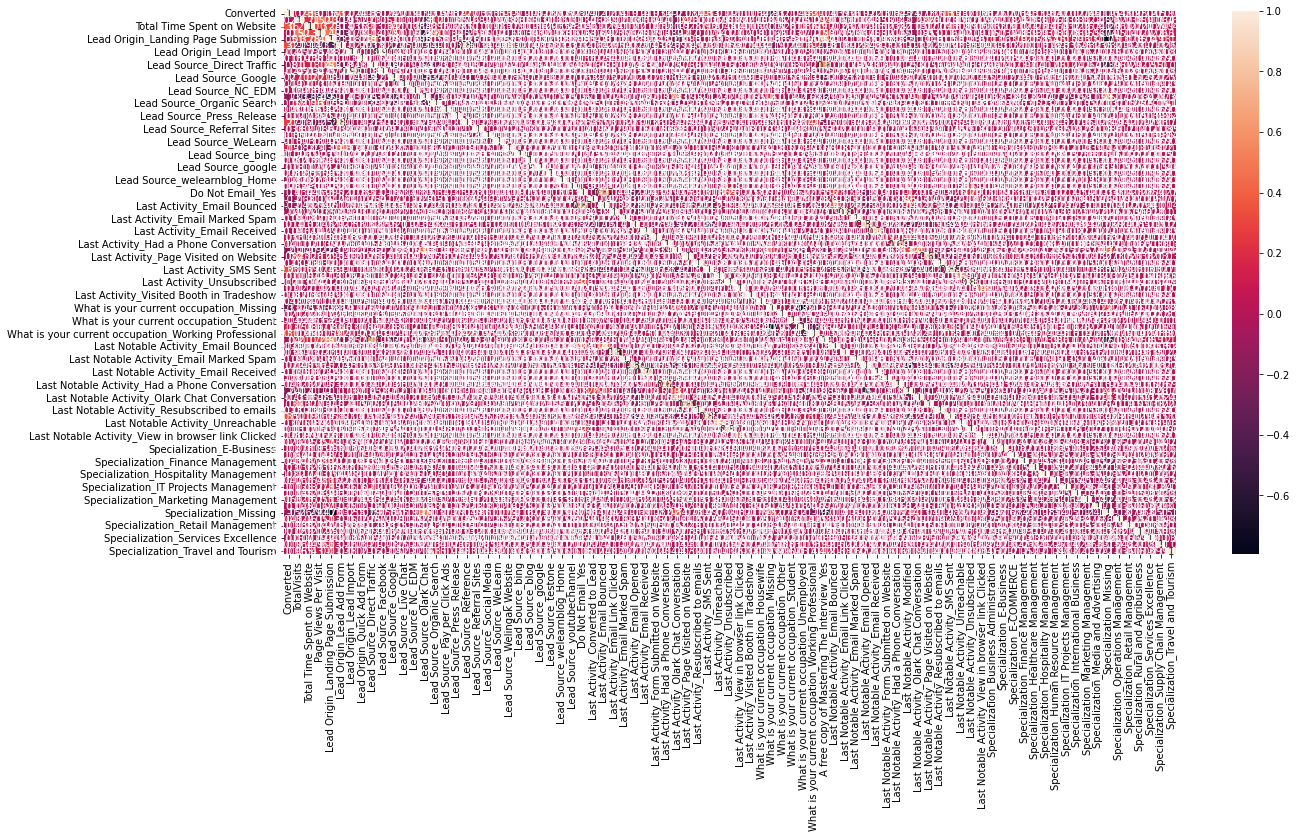

In [50]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads_data.corr(),annot = True)
plt.show()

#### Building Logistic Regression Model


In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             #20 variables RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 42),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 43),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 50),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 11),
 ('Lead Source_WeLearn', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_blog', False, 34),
 ('Lead Source_google', False, 30),
 ('Lead Source_testone', False, 65),
 ('

In [53]:
#Select RFE columns
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [54]:
# Fit a logistic Regression model 

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.7
Date:                Wed, 12 Jan 2022   Deviance:                       5139.4
Time:                        19:29:47   Pearson chi2:                 7.02e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0209      0.128     -0.163      0.871      -0.273       0.231
Total Time Spent on Website                              1.0760      0.040     26.774      0.000       0.997       1.155
Lead Origin_Landing Page Submission                     -1.0570      0.130     -8.152      0.000      -1.311      -0.803
Lead Origin_Lead Add Form                                2.9258      0.204     14.318      0.000       2.525       3.326
Lead Source_NC_EDM                                      23.7890   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.0769      0.124      8.668      0.000       0.833       1.320
Lead Source_Welingak Website                             2.3373      0.745      3.138      0.002       0.878       3.797
Do Not Email_Yes                                        -1.1955      0.169     -7.087      0.000      -1.526      -0.865
Last Activity_Had a Phone Conversation                   1.1044      0.970      1.139      0.255      -0.796       3.005
Last Activity_Olark Chat Conversation                   -0.7730      0.177     -4.371      0.000      -1.120      -0.426
Last Activity_Resubscribed to emails                    12.2273   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   1.2587      0.076     16.661      0.000       1.111       1.407
What is your current occupation_Housewife               22.8783   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing                 -1.0253      0.089    -11.556      0.000      -1.199      -0.851
What is your current occupation_Working Professional     2.4260      0.192     12.637      0.000       2.050       2.802
Last Notable Activity_Had a Phone Conversation           2.2060      1.484      1.487      0.137      -0.702       5.114
Last Notable Activity_Modified                          -0.7952      0.083     -9.604      0.000      -0.957      -0.633
Last Notable Activity_Resubscribed to emails            12.2273   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Notable Activity_Unreachable                        1.6930      0.547      3.095      0.002       0.621       2.765
Specialization_Hospitality Management                   -0.9595      0.331     -2.901      0.004      -1.608      -0.311
Specialization_Missing                                  -0.9667      0.125     -7.740      0.000      -1.211      -0.722
========================================================================================================================
"""

In [55]:
#Exploring VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_Resubscribed to emails,inf
9,Last Activity_Resubscribed to emails,inf
19,Specialization_Missing,2.33
4,Lead Source_Olark Chat,2.05
7,Last Activity_Had a Phone Conversation,2.02
14,Last Notable Activity_Had a Phone Conversation,2.01
1,Lead Origin_Landing Page Submission,1.85
15,Last Notable Activity_Modified,1.82
12,What is your current occupation_Missing,1.63
8,Last Activity_Olark Chat Conversation,1.59


In [56]:
X_train.drop('Last Notable Activity_Resubscribed to emails', axis = 1, inplace = True)

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Specialization_Missing,2.33
4,Lead Source_Olark Chat,2.05
7,Last Activity_Had a Phone Conversation,2.02
14,Last Notable Activity_Had a Phone Conversation,2.01
1,Lead Origin_Landing Page Submission,1.85
15,Last Notable Activity_Modified,1.82
12,What is your current occupation_Missing,1.63
8,Last Activity_Olark Chat Conversation,1.59
10,Last Activity_SMS Sent,1.55
2,Lead Origin_Lead Add Form,1.51


In [58]:
# Refit the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.7
Date:                Wed, 12 Jan 2022   Deviance:                       5139.4
Time:                        19:29:48   Pearson chi2:                 7.02e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0209      0.128     -0.163      0.871      -0.273       0.231
Total Time Spent on Website                              1.0760      0.040     26.774      0.000       0.997       1.155
Lead Origin_Landing Page Submission                     -1.0570      0.130     -8.152      0.000      -1.311      -0.803
Lead Origin_Lead Add Form                                2.9258      0.204     14.318      0.000       2.525       3.326
Lead Source_NC_EDM                                      23.7890   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   1.0769      0.124      8.668      0.000       0.833       1.320
Lead Source_Welingak Website                             2.3373      0.745      3.138      0.002       0.878       3.797
Do Not Email_Yes                                        -1.1955      0.169     -7.087      0.000      -1.526      -0.865
Last Activity_Had a Phone Conversation                   1.1044      0.970      1.139      0.255      -0.796       3.005
Last Activity_Olark Chat Conversation                   -0.7730      0.177     -4.371      0.000      -1.120      -0.426
Last Activity_Resubscribed to emails                    24.4547   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.2587      0.076     16.661      0.000       1.111       1.407
What is your current occupation_Housewife               22.8783   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing                 -1.0253      0.089    -11.556      0.000      -1.199      -0.851
What is your current occupation_Working Professional     2.4260      0.192     12.637      0.000       2.050       2.802
Last Notable Activity_Had a Phone Conversation           2.2060      1.484      1.487      0.137      -0.702       5.114
Last Notable Activity_Modified                          -0.7952      0.083     -9.604      0.000      -0.957      -0.633
Last Notable Activity_Unreachable                        1.6930      0.547      3.095      0.002       0.621       2.765
Specialization_Hospitality Management                   -0.9595      0.331     -2.901      0.004      -1.608      -0.311
Specialization_Missing                                  -0.9667      0.125     -7.740      0.000      -1.211      -0.722
========================================================================================================================
"""

In [59]:
#VIF analysis

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Specialization_Missing,2.33
4,Lead Source_Olark Chat,2.05
7,Last Activity_Had a Phone Conversation,2.02
14,Last Notable Activity_Had a Phone Conversation,2.01
1,Lead Origin_Landing Page Submission,1.85
15,Last Notable Activity_Modified,1.82
12,What is your current occupation_Missing,1.63
8,Last Activity_Olark Chat Conversation,1.59
10,Last Activity_SMS Sent,1.55
2,Lead Origin_Lead Add Form,1.51


In [60]:
#Removing variables with p-value greater than 0.05
X_train.drop('Lead Source_NC_EDM', axis = 1, inplace = True)

In [61]:
# Refit model Run 2

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.2
Date:                Wed, 12 Jan 2022   Deviance:                       5142.3
Time:                        19:29:49   Pearson chi2:                 7.02e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0203      0.128     -0.158      0.874      -0.272       0.231
Total Time Spent on Website                              1.0763      0.040     26.784      0.000       0.998       1.155
Lead Origin_Landing Page Submission                     -1.0557      0.130     -8.142      0.000      -1.310      -0.802
Lead Origin_Lead Add Form                                2.9275      0.204     14.326      0.000       2.527       3.328
Lead Source_Olark Chat                                   1.0767      0.124      8.668      0.000       0.833       1.320
Lead Source_Welingak Website                             2.3377      0.745      3.139      0.002       0.878       3.797
Do Not Email_Yes                                        -1.1962      0.169     -7.093      0.000      -1.527      -0.866
Last Activity_Had a Phone Conversation                   1.1038      0.970      1.138      0.255      -0.797       3.004
Last Activity_Olark Chat Conversation                   -0.7733      0.177     -4.374      0.000      -1.120      -0.427
Last Activity_Resubscribed to emails                    24.4504   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.2569      0.076     16.642      0.000       1.109       1.405
What is your current occupation_Housewife               22.8772   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing                 -1.0203      0.089    -11.514      0.000      -1.194      -0.847
What is your current occupation_Working Professional     2.4255      0.192     12.634      0.000       2.049       2.802
Last Notable Activity_Had a Phone Conversation           2.2036      1.483      1.485      0.137      -0.704       5.111
Last Notable Activity_Modified                          -0.7969      0.083     -9.627      0.000      -0.959      -0.635
Last Notable Activity_Unreachable                        1.6899      0.547      3.091      0.002       0.618       2.762
Specialization_Hospitality Management                   -0.9609      0.331     -2.905      0.004      -1.609      -0.313
Specialization_Missing                                  -0.9675      0.125     -7.747      0.000      -1.212      -0.723
========================================================================================================================
"""

In [62]:
#Dropping Last Activity_Had a Phone Conversation
#Removing variables with p-value greater than 0.05
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [63]:
# Refit model Run 3

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.9
Date:                Wed, 12 Jan 2022   Deviance:                       5143.7
Time:                        19:29:49   Pearson chi2:                 6.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0199      0.128     -0.155      0.877      -0.272       0.232
Total Time Spent on Website                              1.0772      0.040     26.810      0.000       0.998       1.156
Lead Origin_Landing Page Submission                     -1.0558      0.130     -8.144      0.000      -1.310      -0.802
Lead Origin_Lead Add Form                                2.9309      0.204     14.344      0.000       2.530       3.331
Lead Source_Olark Chat                                   1.0759      0.124      8.664      0.000       0.833       1.319
Lead Source_Welingak Website                             2.3323      0.745      3.132      0.002       0.873       3.792
Do Not Email_Yes                                        -1.1977      0.169     -7.099      0.000      -1.528      -0.867
Last Activity_Olark Chat Conversation                   -0.7781      0.177     -4.402      0.000      -1.125      -0.432
Last Activity_Resubscribed to emails                    24.4509   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.2551      0.076     16.620      0.000       1.107       1.403
What is your current occupation_Housewife               22.8736   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing                 -1.0207      0.089    -11.521      0.000      -1.194      -0.847
What is your current occupation_Working Professional     2.4323      0.192     12.680      0.000       2.056       2.808
Last Notable Activity_Had a Phone Conversation           3.3075      1.123      2.945      0.003       1.106       5.509
Last Notable Activity_Modified                          -0.7912      0.083     -9.579      0.000      -0.953      -0.629
Last Notable Activity_Unreachable                        1.6897      0.547      3.090      0.002       0.618       2.762
Specialization_Hospitality Management                   -0.9636      0.331     -2.913      0.004      -1.612      -0.315
Specialization_Missing                                  -0.9664      0.125     -7.740      0.000      -1.211      -0.722
========================================================================================================================
"""

In [64]:
#Dropping Last Activity_Resubscribed to emails
#Removing variables with p-value greater than 0.05
X_train.drop('Last Activity_Resubscribed to emails', axis = 1, inplace = True)

In [65]:
# Refit model Run 4

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.9
Date:                Wed, 12 Jan 2022   Deviance:                       5147.8
Time:                        19:29:49   Pearson chi2:                 6.75e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0209      0.128     -0.163      0.871      -0.273       0.231
Total Time Spent on Website                              1.0769      0.040     26.808      0.000       0.998       1.156
Lead Origin_Landing Page Submission                     -1.0544      0.130     -8.134      0.000      -1.308      -0.800
Lead Origin_Lead Add Form                                2.9322      0.204     14.351      0.000       2.532       3.333
Lead Source_Olark Chat                                   1.0814      0.124      8.713      0.000       0.838       1.325
Lead Source_Welingak Website                             2.3315      0.745      3.131      0.002       0.872       3.791
Do Not Email_Yes                                        -1.1983      0.169     -7.104      0.000      -1.529      -0.868
Last Activity_Olark Chat Conversation                   -0.7828      0.177     -4.430      0.000      -1.129      -0.436
Last Activity_SMS Sent                                   1.2531      0.075     16.600      0.000       1.105       1.401
What is your current occupation_Housewife               22.8737   1.35e+04      0.002      0.999   -2.64e+04    2.64e+04
What is your current occupation_Missing                 -1.0161      0.088    -11.483      0.000      -1.190      -0.843
What is your current occupation_Working Professional     2.4328      0.192     12.683      0.000       2.057       2.809
Last Notable Activity_Had a Phone Conversation           3.3058      1.123      2.944      0.003       1.105       5.506
Last Notable Activity_Modified                          -0.7926      0.083     -9.600      0.000      -0.954      -0.631
Last Notable Activity_Unreachable                        1.6868      0.547      3.086      0.002       0.615       2.758
Specialization_Hospitality Management                   -0.9632      0.331     -2.912      0.004      -1.612      -0.315
Specialization_Missing                                  -0.9646      0.125     -7.727      0.000      -1.209      -0.720
========================================================================================================================
"""

In [66]:
#Dropping What is your current occupation_Housewife
#Removing variables with p-value greater than 0.05
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [67]:
# Refit model Run 5

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.9
Date:                Wed, 12 Jan 2022   Deviance:                       5161.8
Time:                        19:29:49   Pearson chi2:                 6.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0153      0.128     -0.119      0.905      -0.267       0.236
Total Time Spent on Website                              1.0757      0.040     26.813      0.000       0.997       1.154
Lead Origin_Landing Page Submission                     -1.0489      0.130     -8.099      0.000      -1.303      -0.795
Lead Origin_Lead Add Form                                2.9462      0.204     14.438      0.000       2.546       3.346
Lead Source_Olark Chat                                   1.0812      0.124      8.716      0.000       0.838       1.324
Lead Source_Welingak Website                             2.3163      0.745      3.110      0.002       0.857       3.776
Do Not Email_Yes                                        -1.2047      0.169     -7.144      0.000      -1.535      -0.874
Last Activity_Olark Chat Conversation                   -0.7888      0.177     -4.465      0.000      -1.135      -0.443
Last Activity_SMS Sent                                   1.2452      0.075     16.514      0.000       1.097       1.393
What is your current occupation_Missing                 -1.0207      0.088    -11.545      0.000      -1.194      -0.847
What is your current occupation_Working Professional     2.4234      0.192     12.641      0.000       2.048       2.799
Last Notable Activity_Had a Phone Conversation           3.2962      1.123      2.936      0.003       1.096       5.497
Last Notable Activity_Modified                          -0.7870      0.082     -9.555      0.000      -0.948      -0.626
Last Notable Activity_Unreachable                        1.6802      0.547      3.073      0.002       0.609       2.752
Specialization_Hospitality Management                   -0.9702      0.331     -2.934      0.003      -1.618      -0.322
Specialization_Missing                                  -0.9679      0.125     -7.759      0.000      -1.212      -0.723
========================================================================================================================
"""

In [68]:
#Final VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Specialization_Missing,2.33
3,Lead Source_Olark Chat,2.05
1,Lead Origin_Landing Page Submission,1.85
11,Last Notable Activity_Modified,1.81
8,What is your current occupation_Missing,1.63
6,Last Activity_Olark Chat Conversation,1.59
7,Last Activity_SMS Sent,1.54
2,Lead Origin_Lead Add Form,1.50
4,Lead Source_Welingak Website,1.27
0,Total Time Spent on Website,1.24


#### Evaluating the model


In [69]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.525811
6795    0.115226
3516    0.341943
8105    0.838863
3934    0.159958
4844    0.990159
3297    0.134329
8071    0.995315
987     0.103761
7423    0.916504
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52581098, 0.11522576, 0.34194252, 0.83886344, 0.15995829,
       0.99015873, 0.13432867, 0.99531544, 0.10376107, 0.91650378])

##### Creating a dataframe with the actual lead conversion and the predicted probabilities

In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
#y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob
0,0,0.525811
1,0,0.115226
2,0,0.341943
3,0,0.838863
4,0,0.159958


##### Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,predicted
0,0,0.525811,1
1,0,0.115226,0
2,0,0.341943,0
3,0,0.838863,1
4,0,0.159958,0


In [73]:
from sklearn import metrics

In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3553  449]
 [ 718 1748]]


In [75]:
# Predicted     not_converted    converted
# Actual
# not_converted       3553         449
# converted           718         1748 

In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8195732838589982


####  Other Metrics 

In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7088402270884022

In [79]:
# Let us calculate specificity
TN / float(TN+FP)

0.8878060969515242

In [80]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11219390304847576


In [81]:
# positive predictive value 
print (TP / float(TP+FP))

0.7956304050978608


In [82]:
# Negative predictive value
print (TN / float(TN+ FN))


0.8318894872395224


### Step 5: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

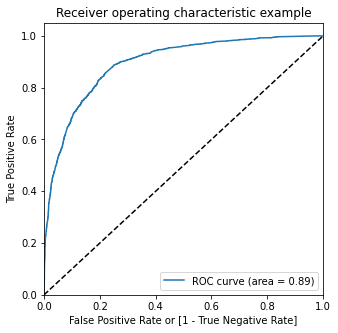

In [85]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Step 6: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.525811,1,1,1,1,1,1,1,0,0,0,0
1,0,0.115226,0,1,1,0,0,0,0,0,0,0,0
2,0,0.341943,0,1,1,1,1,0,0,0,0,0,0
3,0,0.838863,1,1,1,1,1,1,1,1,1,1,0
4,0,0.159958,0,1,1,0,0,0,0,0,0,0,0


In [87]:
# Accuracy,Sensitivity, Specificity 
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.640229  0.969586  0.437281
0.2   0.2  0.772109  0.913220  0.685157
0.3   0.3  0.809215  0.854826  0.781109
0.4   0.4  0.815863  0.778589  0.838831
0.5   0.5  0.819573  0.708840  0.887806
0.6   0.6  0.807205  0.615977  0.925037
0.7   0.7  0.792672  0.544201  0.945777
0.8   0.8  0.768398  0.438362  0.971764
0.9   0.9  0.722480  0.293998  0.986507


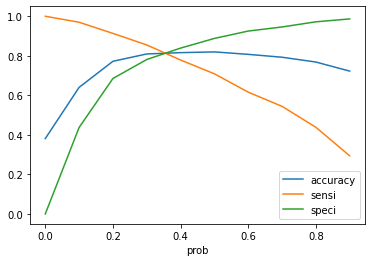

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.525811,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.115226,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.341943,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.838863,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.159958,0,1,1,0,0,0,0,0,0,0,0,0


In [90]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8129251700680272

In [91]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3306,  696],
       [ 514, 1952]])

In [92]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.7915652879156528

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.8260869565217391

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17391304347826086


In [96]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7371601208459214


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8654450261780104


## Precision and Recall

In [98]:
#Looking at the confusion matrix again

In [99]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3553,  449],
       [ 718, 1748]])

##### Precision
TP / TP + FP

In [100]:
pr = confusion[1,1]/(confusion[0,1]+confusion[1,1])
pr

0.7956304050978608

##### Recall
TP / TP + FN

In [101]:
rc= confusion[1,1]/(confusion[1,0]+confusion[1,1])
rc

0.7088402270884022

In [102]:
#F1 score
f1= (2*pr*rc)/(pr+rc)
f1

0.7497319322324685

Using sklearn utilities for the same

In [103]:
from sklearn.metrics import precision_score, recall_score

In [104]:
?precision_score

In [105]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7956304050978608

In [106]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7088402270884022

### Precision and recall tradeoff

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

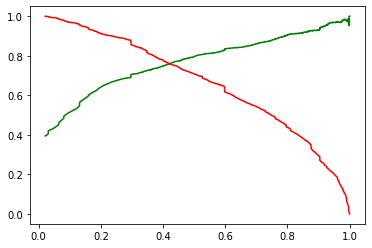

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Precision and Recall tradeoff point was obtained at approximately 0.42

## Step 7: Evaluating the model on Test Data


In [111]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [112]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable,Specialization_Hospitality Management,Specialization_Missing
4269,0.964504,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2376,-0.885371,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7766,-0.777416,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9199,-0.885371,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4359,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable,Specialization_Hospitality Management,Specialization_Missing
4269,1.0,0.964504,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2376,1.0,-0.885371,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7766,1.0,-0.777416,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9199,1.0,-0.885371,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4359,1.0,-0.885371,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,-0.354744,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2152,1.0,-0.885371,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7101,1.0,-0.885371,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5331,1.0,2.056864,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [114]:
X_train


,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Missing,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Specialization_Hospitality Management,Specialization_Missing
1871,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.005716,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3516,-0.691418,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8105,1.365219,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3934,-0.885371,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0
79,0.404601,0,1,0,0,0,0,0,0,1,0,1,0,1,0
8039,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6936,-0.449891,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [115]:
X_test.drop(['Last Notable Activity_Resubscribed to emails','Lead Source_NC_EDM','Last Activity_Had a Phone Conversation','Last Activity_Resubscribed to emails','What is your current occupation_Housewife'], 1, inplace = True)

In [116]:
X_train


,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Missing,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Specialization_Hospitality Management,Specialization_Missing
1871,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.005716,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3516,-0.691418,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8105,1.365219,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3934,-0.885371,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0
79,0.404601,0,1,0,0,0,0,0,0,1,0,1,0,1,0
8039,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6936,-0.449891,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [117]:
X_test

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Missing,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Specialization_Hospitality Management,Specialization_Missing
4269,0.964504,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2376,-0.885371,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7766,-0.777416,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9199,-0.885371,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4359,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,-0.354744,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2152,-0.885371,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7101,-0.885371,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5331,2.056864,1,0,0,0,1,0,0,1,0,0,1,0,0,0


In [118]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set and evaluating metrics on test set


In [119]:
logm = sm.GLM(y_test, X_test_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2756
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1089.9
Date:                Wed, 12 Jan 2022   Deviance:                       2179.9
Time:                        19:29:51   Pearson chi2:                 2.75e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1248      0.191     -0.653      0.514      -0.500       0.250
Total Time Spent on Website                              1.1260      0.063     17.797      0.000       1.002       1.250
Lead Origin_Landing Page Submission                     -0.7777      0.192     -4.059      0.000      -1.153      -0.402
Lead Origin_Lead Add Form                                3.2620      0.351      9.281      0.000       2.573       3.951
Lead Source_Olark Chat                                   1.3391      0.193      6.932      0.000       0.960       1.718
Lead Source_Welingak Website                            22.6900    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
Do Not Email_Yes                                        -1.5099      0.253     -5.960      0.000      -2.006      -1.013
Last Activity_Olark Chat Conversation                   -1.3150      0.264     -4.977      0.000      -1.833      -0.797
Last Activity_SMS Sent                                   1.3539      0.118     11.469      0.000       1.123       1.585
What is your current occupation_Missing                 -1.4495      0.141    -10.290      0.000      -1.726      -1.173
What is your current occupation_Working Professional     2.1354      0.284      7.512      0.000       1.578       2.693
Last Notable Activity_Had a Phone Conversation          24.5009   6.76e+04      0.000      1.000   -1.32e+05    1.33e+05
Last Notable Activity_Modified                          -0.6917      0.122     -5.649      0.000      -0.932      -0.452
Last Notable Activity_Unreachable                        1.5278      0.887      1.723      0.085      -0.210       3.265
Specialization_Hospitality Management                    0.4810      0.546      0.882      0.378      -0.588       1.550
Specialization_Missing                                  -0.7582      0.188     -4.027      0.000      -1.127      -0.389
========================================================================================================================
"""

In [120]:
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4269    0.526844
2376    0.939118
7766    0.934804
9199    0.072592
4359    0.894755
9186    0.671591
1631    0.546783
8963    0.209532
8007    0.034493
5324    0.446236
dtype: float64

In [121]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
# Let's see the head
y_pred_1.head()

,0
4269,0.526844
2376,0.939118
7766,0.934804
9199,0.072592
4359,0.894755


In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [124]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.526844
1,1,2376,0.939118
2,1,7766,0.934804
3,0,9199,0.072592
4,1,4359,0.894755


In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [129]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','CustID','Conv_Prob'], axis=1)

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,CustID,Conv_Prob
0,1,4269,0.526844
1,1,2376,0.939118
2,1,7766,0.934804
3,0,9199,0.072592
4,1,4359,0.894755


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [132]:
y_pred_final.head()

,Converted,CustID,Conv_Prob,final_predicted
0,1,4269,0.526844,1
1,1,2376,0.939118,1
2,1,7766,0.934804,1
3,0,9199,0.072592,0
4,1,4359,0.894755,1


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8127705627705628

In [134]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7380165289256199

In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1360,  317],
       [ 202,  893]])

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8155251141552512

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8109719737626714

In [139]:
# Negative predictive value
print (TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))
# positive predictive value 
print (TP / float(TP+FP))


0.8706786171574904
0.18902802623732856
0.7380165289256199


In [140]:
#Recall
rc= confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
rc

0.8155251141552512

In [141]:
#Precision
pr = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
pr

0.7380165289256199

In [142]:
#F1 score
f1= (2*pr*rc)/(pr+rc)
f1

0.7748373101952277

## Step 8: Metrics Evaluation

i). The Sensitivity, Specificity, Accuracy, Precision and Recall values for test and train are similar, reflecting that the model was not overfitted and performs well for new data.

ii). High recall value than precision for test data suggests a good working model that can correctly work with
 new data in future.

iii). Sensitivity is greater for test data, implies better prediction of converted leads for test data.

iv).Since both precision and recall were moderately high, we have a moderate value of F1-score.
 For prescion and recall trade-off, F1 score was found to be 0.7497 for train and 0.7748 for test. These
 suggest a fairly stable model with precision and recall trade-off.

v). Accuracy is almost same for train and test.

## Conclusion

Based on the magnitude of the co-efficients in the final model with 15 features, 
the top variables for prediction are:
1. Last Notable Activity_Had a Phone Conversation
2. Lead Origin_Lead Add Form
3. What is your current occupation_Working Professional
4.  Lead Source_Welingak Website
5. Total Time Spent on Website

There are many leads created in the dataset, but only a handful of them become paying clients in the converted state. In order to have greater lead conversion, we need to nurture the potential leads well in the intermediate stage. (like proper information about the course through appropriate communication channels.

First, filter through the leads you've created to find the best candidates in terms of working professionals.
The most important factors that influence the likelihood of a lead being converted are captured in the varoables above. 


Other than the insights from regression analysis above, we must keep a list of leads on hand for other categories so that they can be kept them updated on new courses, services, career opportunities, and potential higher education opportunities for those not employed to increase lead conversion from other categories. 

A well thoughtout strategy for charting each lead's needs will go a long way
toward converting leads into prospects. Concentrating on leads that have been
 converted. Hold question-and-answer sessions with prospects to get the information
 you need. Make more enquiries and visits with the prospects to determine their
desire to enrol in online courses and their mindset as some of these information
 have not been captured in the dataset. 